In [1]:
# import the necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# get the current working directory
CWD = os.getcwd()

In [2]:
# load the data
train = pd.read_csv(CWD + '/data/train.csv')
test = pd.read_csv(CWD + '/data/test.csv')
print(train.shape, test.shape)

(15035, 21) (6555, 20)


In [3]:
# check the first few rows of the data
train.head()
#train.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [4]:
# check the shape of the data
train.shape

(15035, 21)

In [5]:
# check the data types of the columns
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [15]:
# check the missing values
train.isnull().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
dtype: int64

In [6]:
# split the data into features and target
y = train['price']
del train['price']
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

In [7]:
# combine the train and test data
combined = pd.concat([train, test], axis=0)

# drop the id, zipcode column
combined.drop('id', axis=1, inplace=True)
combined.drop('zipcode', axis=1, inplace=True)

# substring the date column to get the year and month
combined['year'] = combined['date'].apply(lambda x: x[:4]).astype(int)
combined['date'] = combined['date'].apply(lambda x: x[4:6]).astype(int)

In [8]:
# split the data back to train and test
train = combined[:len(train)]
test = combined[len(train):]
print(train.shape, test.shape)

(15035, 19) (6555, 19)


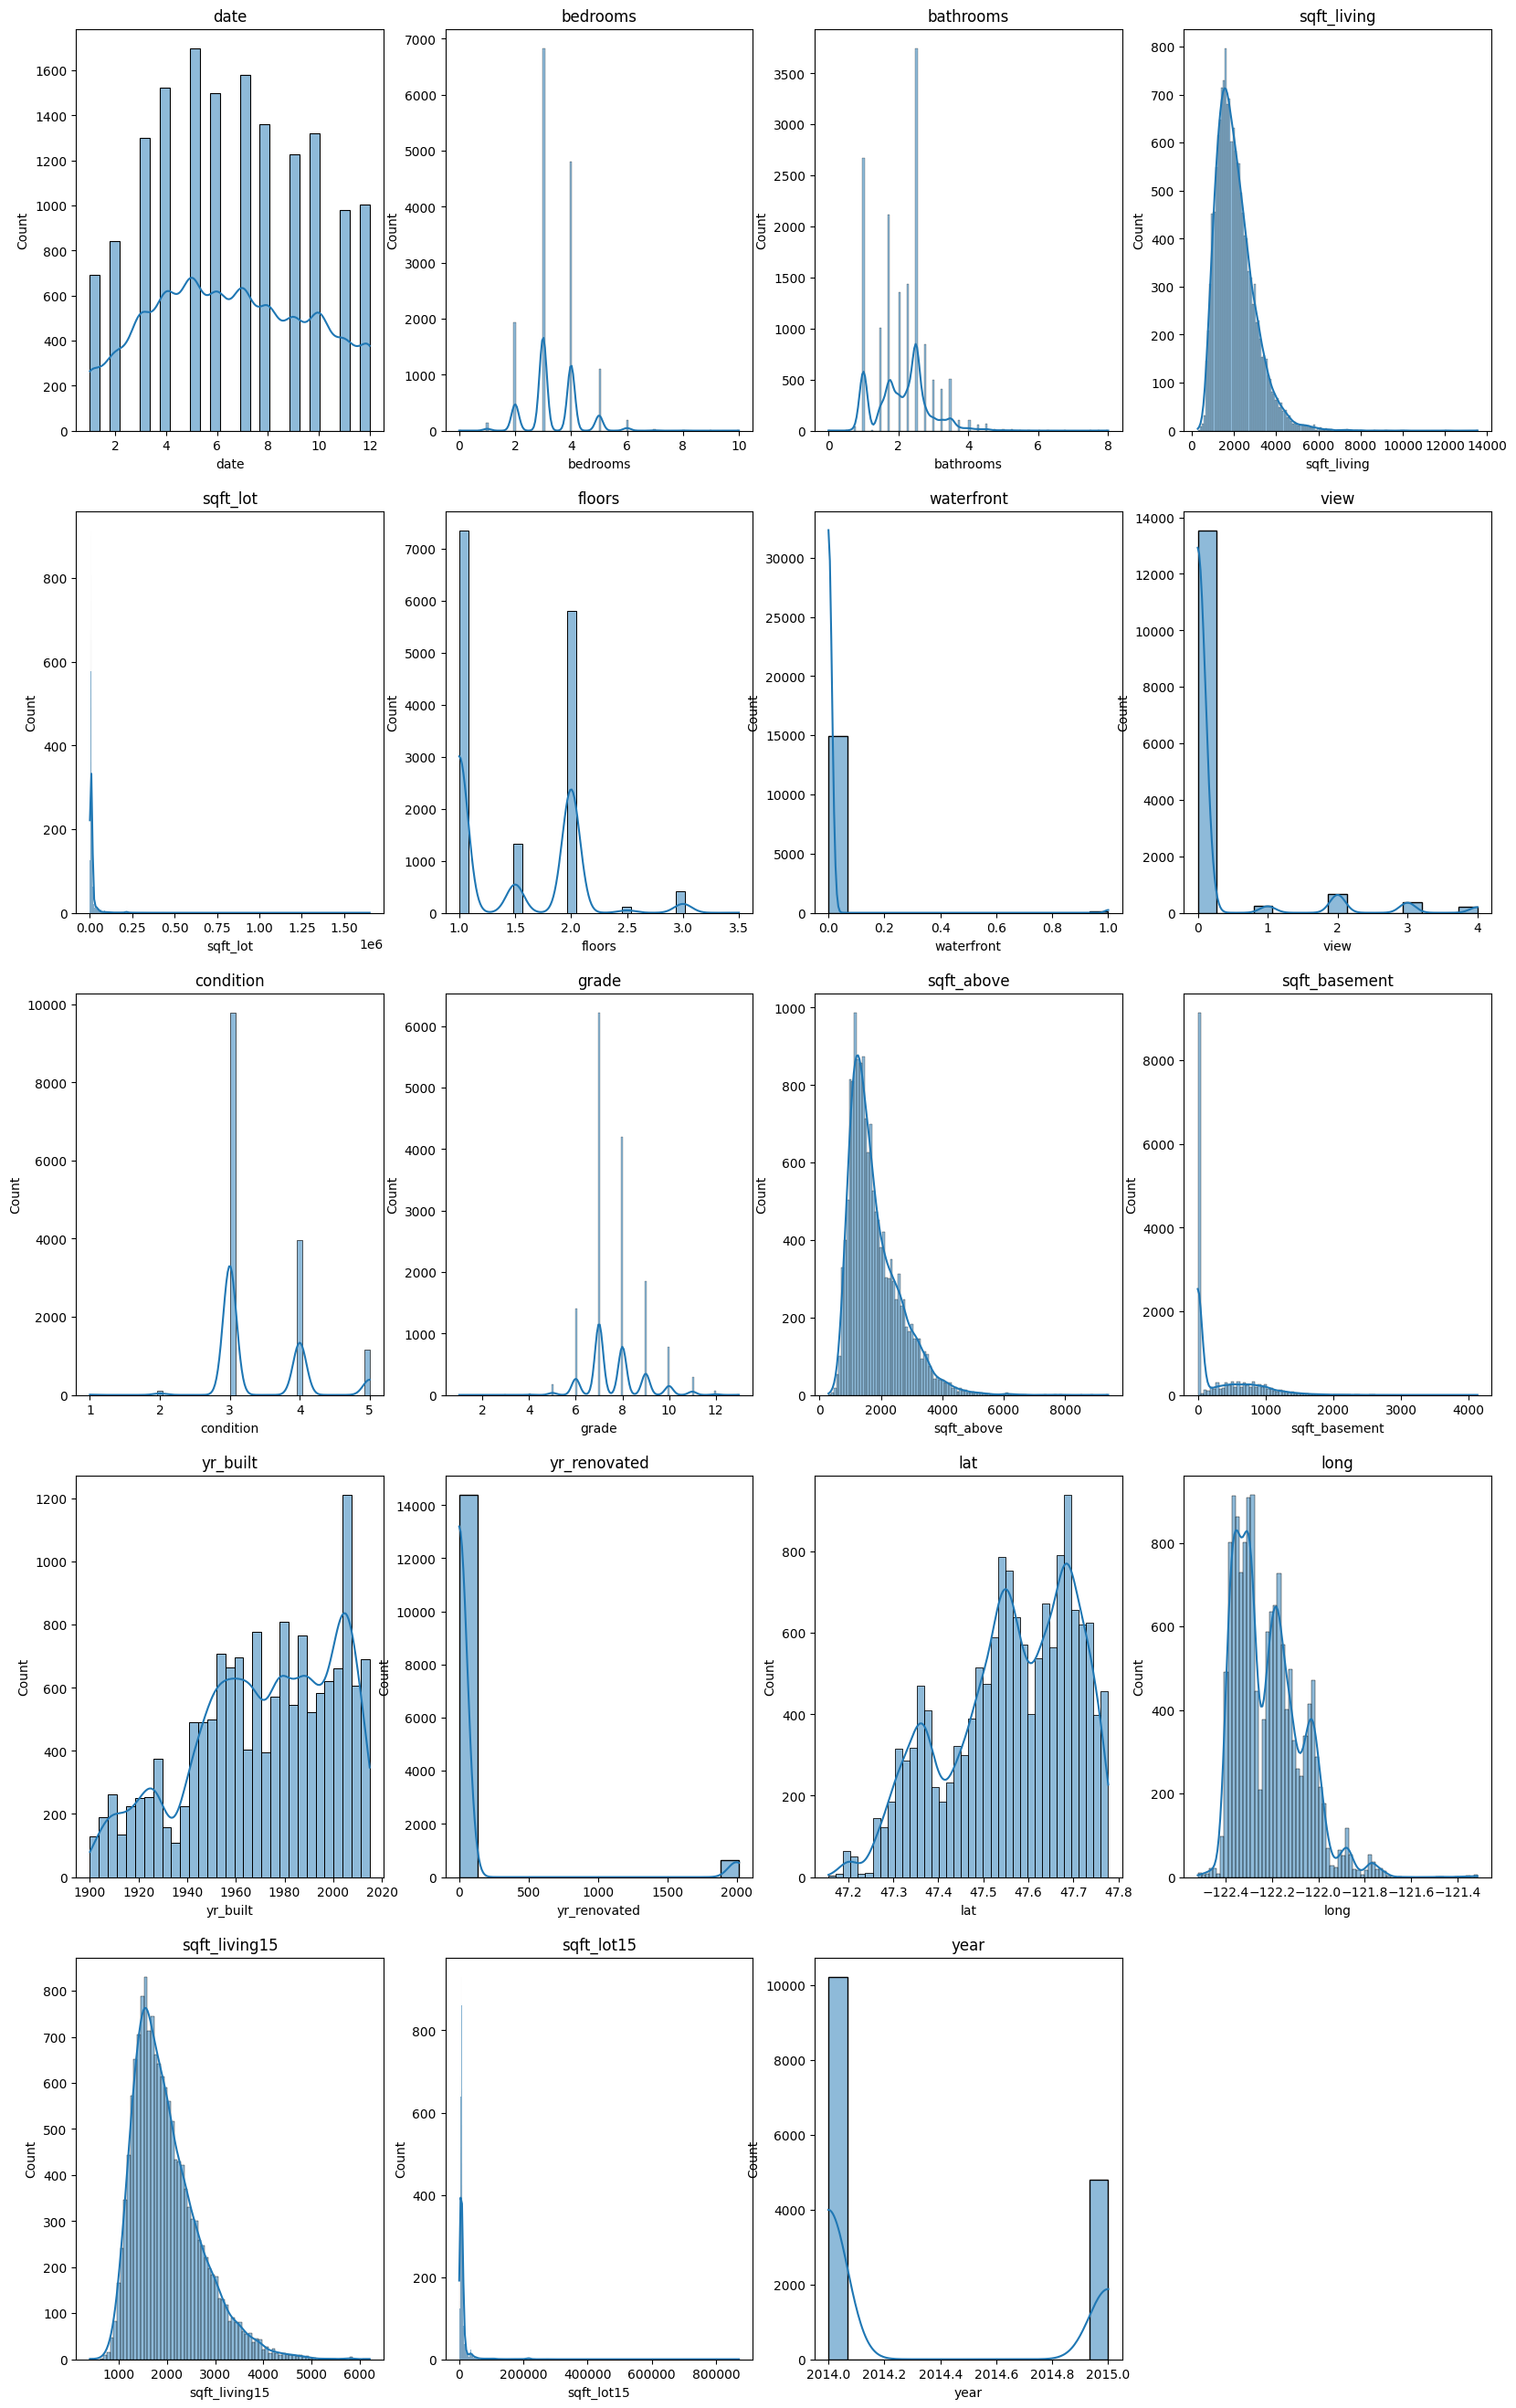

In [9]:
# check the distribution of each feature
plt.figure(figsize=(20, 40))

columns = train.columns
for i in range(len(columns)):
    plt.subplot(6, 4, i+1)
    sns.histplot(train[columns[i]], kde=True)
    plt.title(columns[i])


<Axes: >

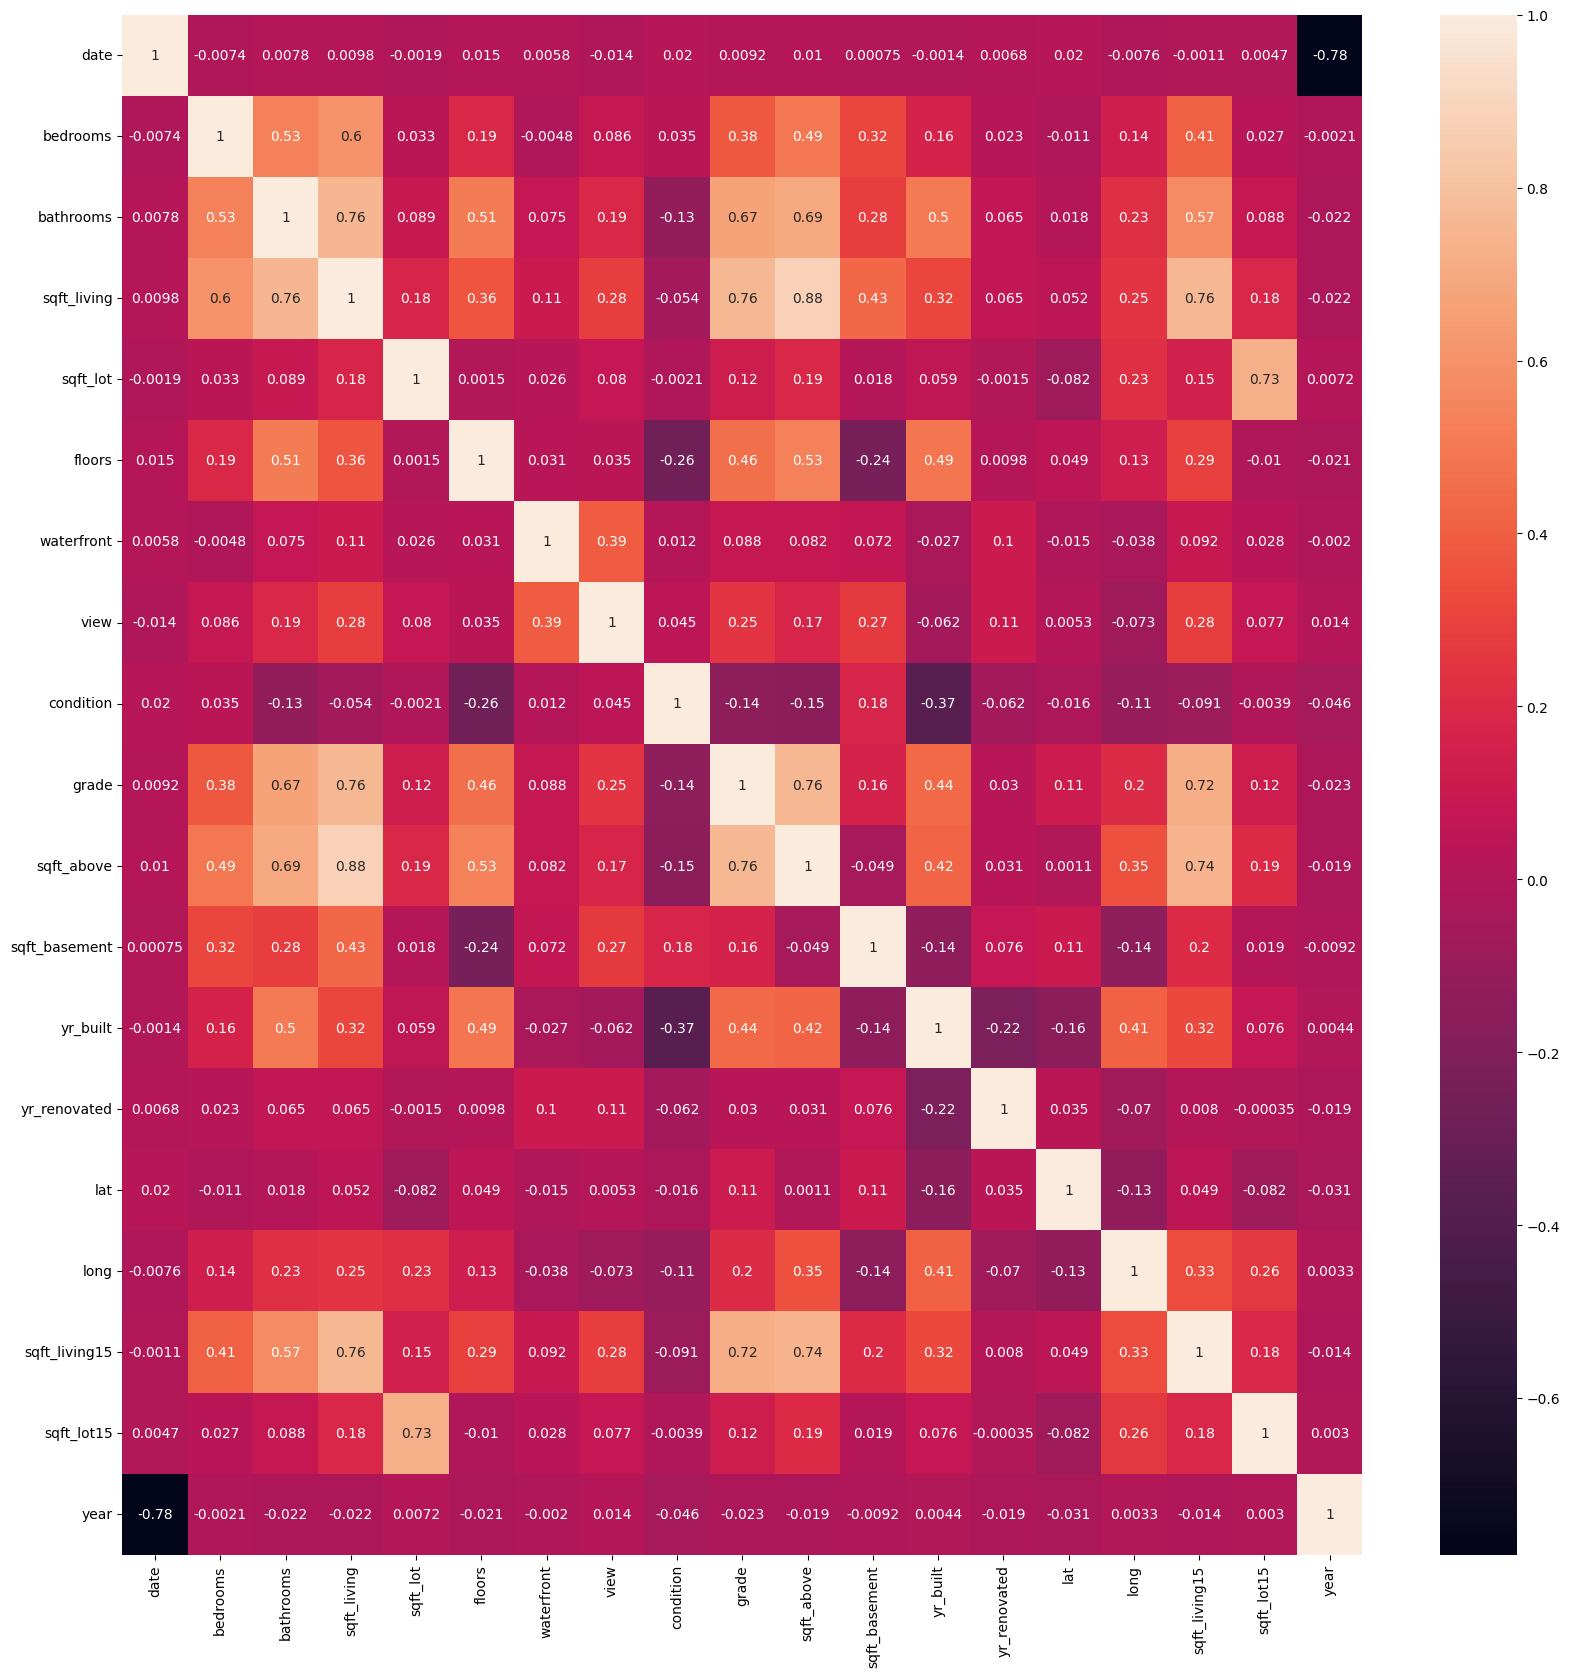

In [10]:
# check the correlation of the features
corr = train.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)


<Axes: xlabel='price', ylabel='Count'>

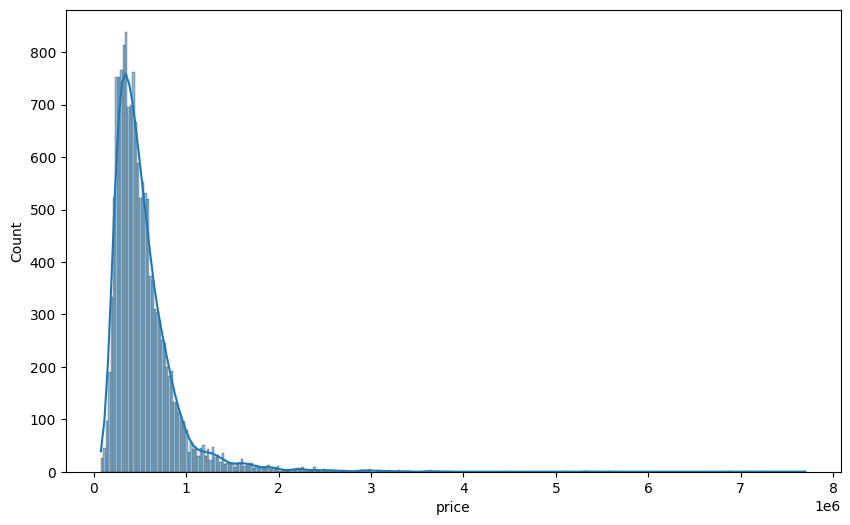

In [11]:
# check the distribution of the target
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)

In [12]:
# Log-transform the target
y = np.log1p(y)

<Axes: xlabel='price', ylabel='Count'>

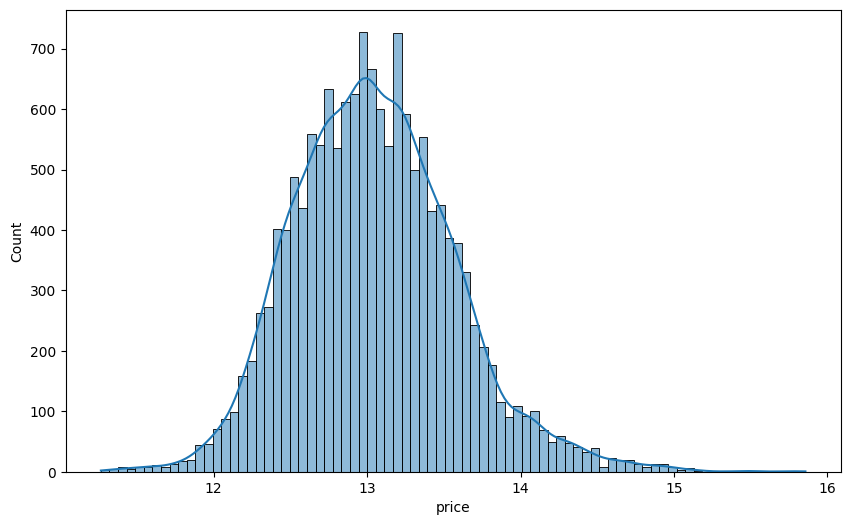

In [13]:
# check the distribution of the target
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int32  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  lat            15035 non-null  float64
 15  long           15035 non-null  float64
 16  sqft_living15  15035 non-null  int64  
 17  sqft_lot15     15035 non-null  int64  
 18  year       

In [17]:
# get the RMSE
from sklearn.metrics import mean_squared_error

def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

In [19]:
# bulid the ensemble models using gboost, lightgbm, xgboost and random forest
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

random_state=2020 
gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# train the models
from sklearn.model_selection import train_test_split


df = {}

for model in models:
    # 모델 이름
    model_name = model.__class__.__name__

    # train, test 데이터셋 분리
    # split the data into train and validation
    X_train, X_val, y_train, y_val = train_test_split(train, y, test_size=0.2, random_state=42)
    # print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)


    model.fit(X_train, y_train)
    # 예측
    y_pred = model.predict(X_val)

    # 예측 결과의 rmse값 저장
    df[model_name] = rmse(y_val, y_pred)
    
    # data frame에 저장
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    
df

In [ ]:
# evaluate the models
def get_scores(models, train, y):
    df = {}
    for model in models:
        # 모델 이름 획득
        model_name = model.__class__.__name__

        # train, test 데이터셋 분리
        # random_state를 사용하여 고정하고 train과 test 셋의 비율은 8:2로 합니다.
        X_train, X_val, y_train, y_val = train_test_split(train, y, test_size=0.2, random_state=random_state)

        # 모델 학습
        model.fit(X_train, y_train)
        
        # 예측
        y_pred = model.predict(X_val)

        # 예측 결과의 rmse값 저장
        df[model_name] = rmse(y_val, y_pred)
        
        # data frame에 저장
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    return df
 
get_scores(models, train, y)


In [ ]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}